## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

## Read Data File

In [2]:
ds = pd.read_csv("netflix_titles.csv")
ds.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


## Data Cleaning

In [3]:
ds.drop(columns=['description', 'show_id'], inplace=True)
ds.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies"
1,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy
2,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV
3,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV
4,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies


In [4]:
ds['date_added'] = pd.to_datetime(ds['date_added'])
ds['date_added_year'] = ds['date_added'].dt.year

ds.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,date_added_year
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",2019.0
1,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,2016.0
2,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,2018.0
3,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,2018.0
4,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,2017.0


C:\Users\KING AG\AppData\Local\Temp\ipykernel_26748\1698232664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_movies['duration'] = ds_movies['duration'].str.replace(' min', '').astype(int)


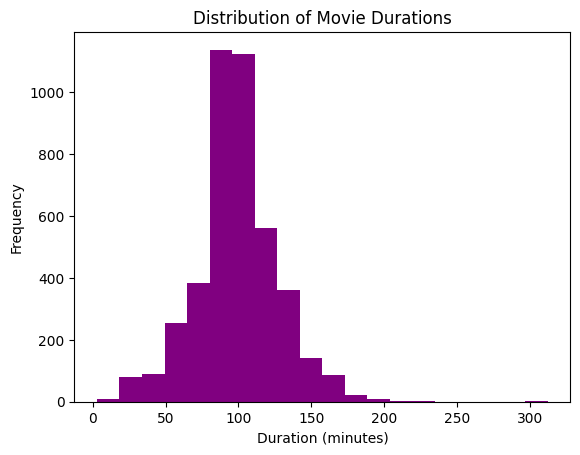

In [5]:
ds_movies = ds[ds['type'] == 'Movie']
ds_movies['duration'] = ds_movies['duration'].str.replace(' min', '').astype(int)
ds_movies['duration'].plot(kind='hist', bins=20, color='purple')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.show()

In [6]:
def convert_duration(duration):
    if 'Season' in duration:
        return 0
    else:
        return int(duration.split(' ')[0])

ds['duration_minutes'] = ds['duration'].apply(convert_duration)

ds.drop(columns='duration', inplace=True)

ds.head()

,type,title,director,cast,country,date_added,release_year,rating,listed_in,date_added_year,duration_minutes
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,"Children & Family Movies, Comedies",2019.0,90
1,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,Stand-Up Comedy,2016.0,94
2,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,Kids' TV,2018.0,0
3,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,Kids' TV,2018.0,0
4,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,Comedies,2017.0,99


In [7]:
ds.isna().sum()

type                   0
title                  0
director            1969
cast                 570
country              476
date_added            11
release_year           0
rating                10
listed_in              0
date_added_year       11
duration_minutes       0
dtype: int64

In [8]:
ds.dropna(inplace=True)
ds.isna().sum()

type                0
title               0
director            0
cast                0
country             0
date_added          0
release_year        0
rating              0
listed_in           0
date_added_year     0
duration_minutes    0
dtype: int64

In [9]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3774 entries, 0 to 6213
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   type              3774 non-null   object        
 1   title             3774 non-null   object        
 2   director          3774 non-null   object        
 3   cast              3774 non-null   object        
 4   country           3774 non-null   object        
 5   date_added        3774 non-null   datetime64[ns]
 6   release_year      3774 non-null   int64         
 7   rating            3774 non-null   object        
 8   listed_in         3774 non-null   object        
 9   date_added_year   3774 non-null   float64       
 10  duration_minutes  3774 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 353.8+ KB


In [10]:
duplicates = ds.duplicated()

print(f"Number of duplicate rows: {duplicates.sum()}")

if duplicates.sum() > 0:
    print("Duplicate rows:")
    print(ds[duplicates])
else:
    print("No duplicates found.")

Number of duplicate rows: 1
Duplicate rows:
       type   title         director  \
2124  Movie  Sarkar  A.R. Murugadoss   

                                                   cast country date_added  \
2124  Vijay, Varalakshmi Sarathkumar, Keerthi Suresh...   India 2019-03-02   

      release_year rating                                         listed_in  \
2124          2018  TV-MA  Action & Adventure, Dramas, International Movies   

      date_added_year  duration_minutes  
2124           2019.0               162  


In [11]:
ds.drop_duplicates(inplace=True)

In [12]:
duplicates = ds.duplicated()

print(f"Number of duplicate rows: {duplicates.sum()}")

if duplicates.sum() > 0:
    print("Duplicate rows:")
    print(ds[duplicates])
else:
    print("No duplicates found.")

Number of duplicate rows: 0
No duplicates found.


In [13]:
cleaned_ds = ds

cleaned_ds.to_csv('cleaned_data.csv', index=False)

print("Data saved to 'cleaned_data.csv'")

Data saved to 'cleaned_data.csv'


Text(0.5, 1.0, 'Movie vs. TV Show')

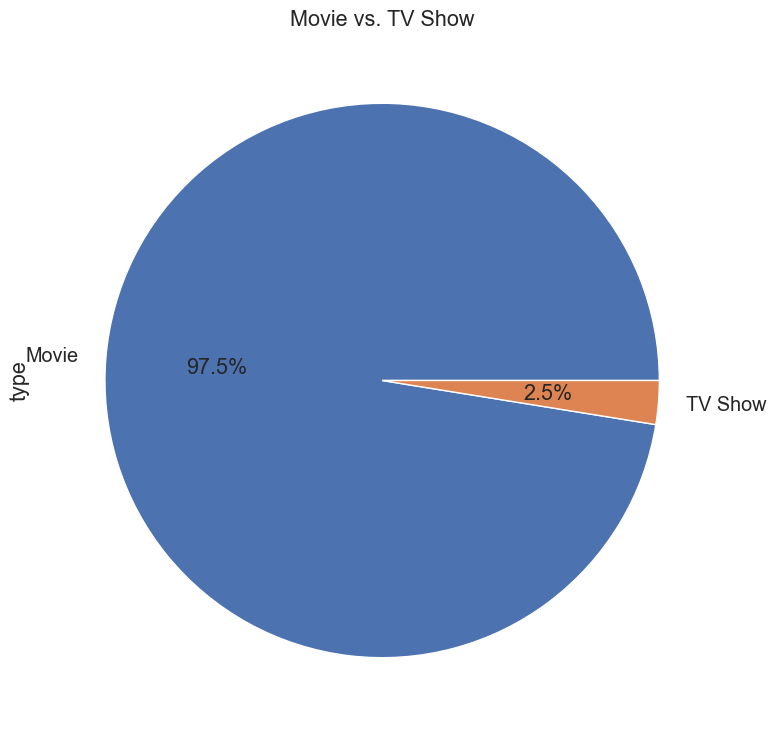

In [14]:
sns.set(rc={'figure.figsize': [15,9]}, font_scale=1.3)

ds['type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Movie vs. TV Show')

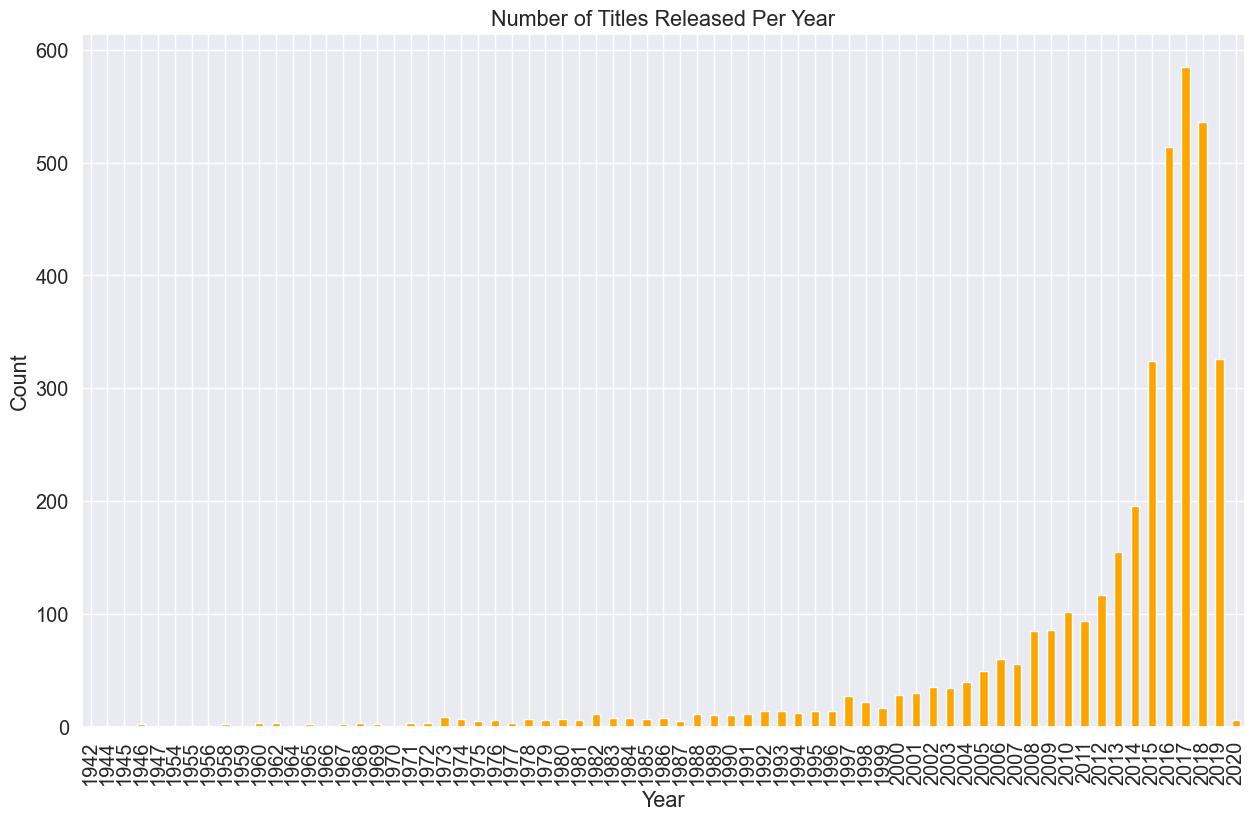

In [15]:
ds['release_year'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Number of Titles Released Per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

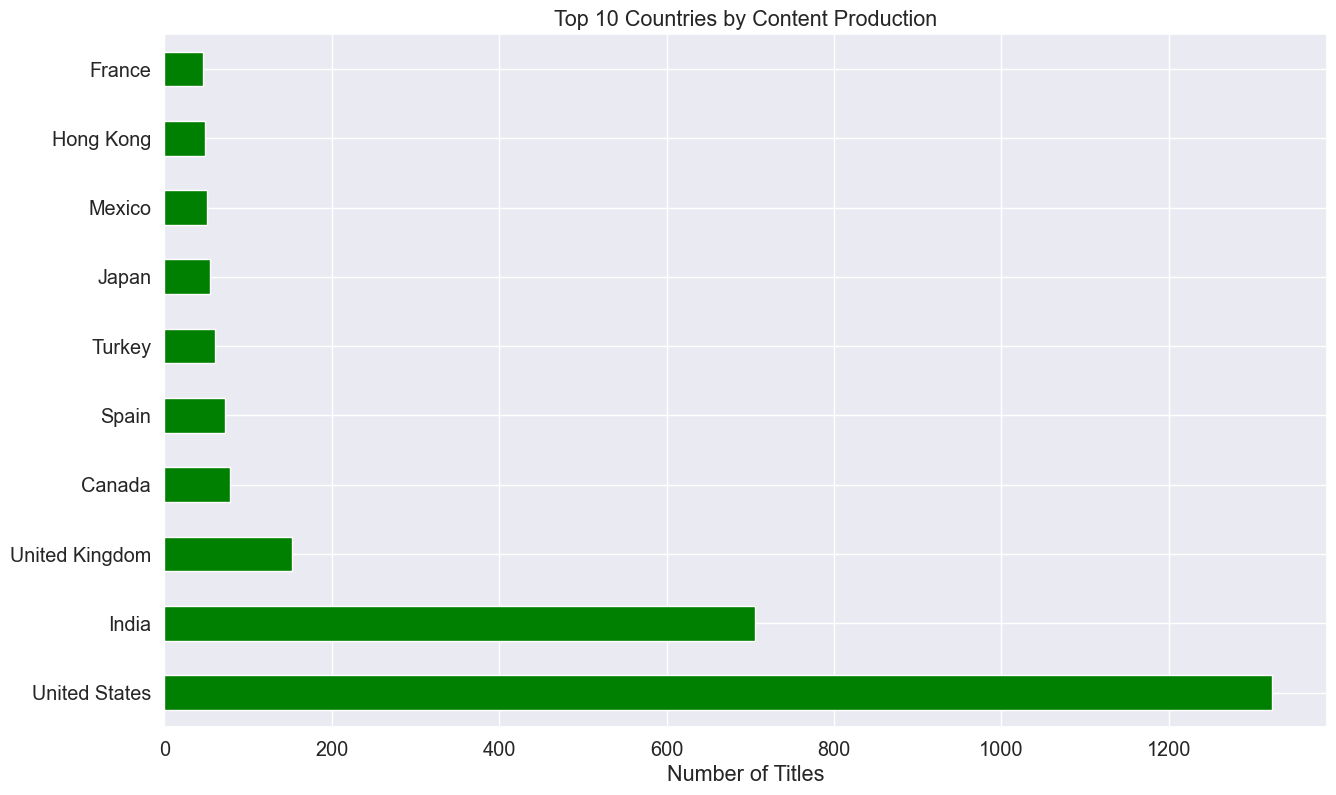

In [16]:
ds['country'].value_counts().nlargest(10).plot(kind='barh', color='green')
plt.title('Top 10 Countries by Content Production')
plt.xlabel('Number of Titles')
plt.show()

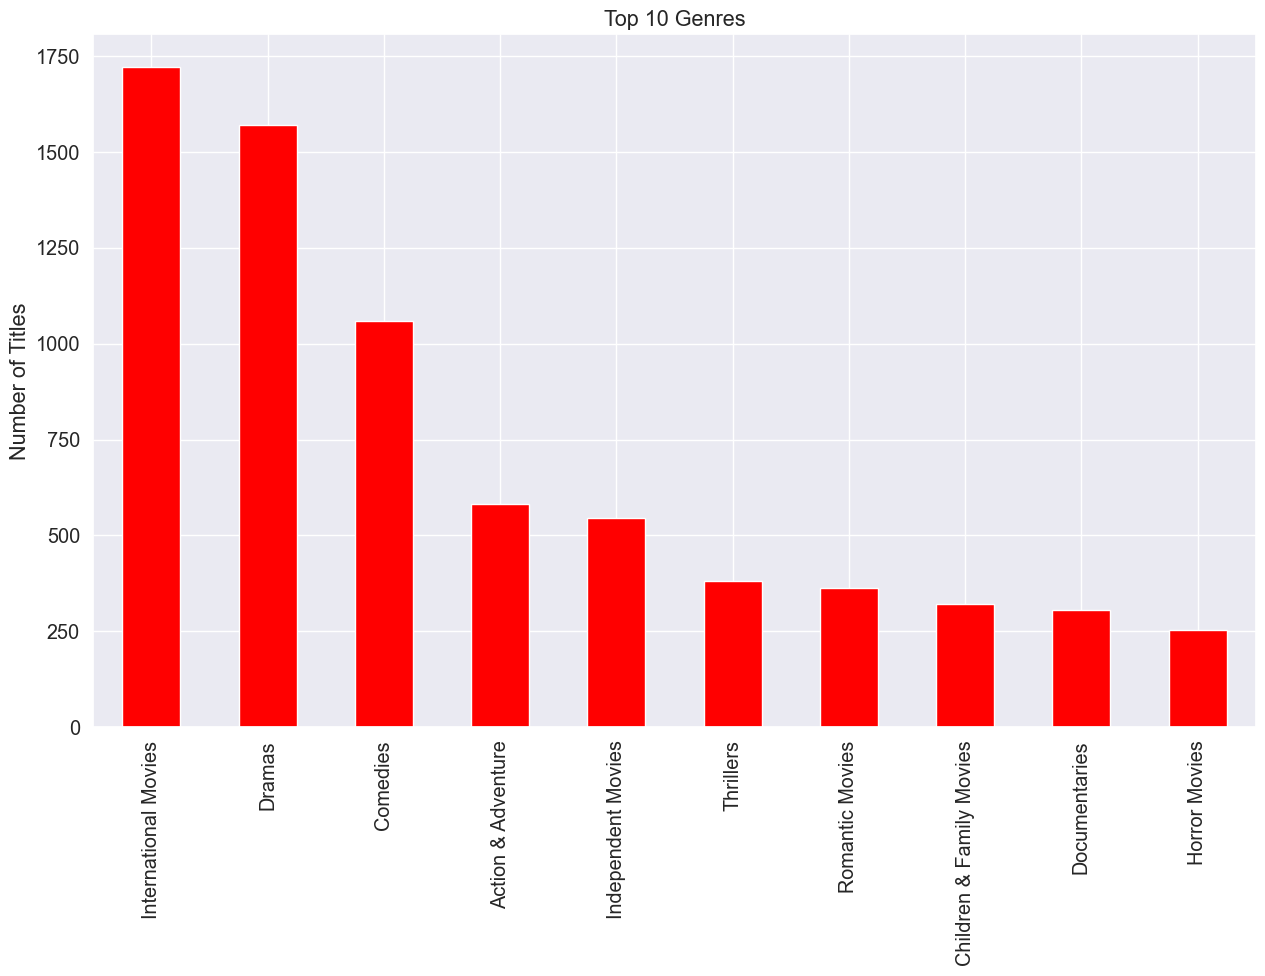

In [17]:
genres = ds['listed_in'].str.split(', ', expand=True).stack().value_counts()
genres.head(10).plot(kind='bar', color='red')
plt.title('Top 10 Genres')
plt.ylabel('Number of Titles')
plt.show()

In [18]:
le = LabelEncoder()
print(ds['type'].unique())
ds['type'] = le.fit_transform(ds['type'])
print('-----------------------------------\n' ,ds['type'].unique())

['Movie' 'TV Show']
-----------------------------------
 [0 1]


In [19]:
print(ds['title'].unique())
ds['title'] = le.fit_transform(ds['title'])
print('-----------------------------------\n' ,ds['title'].unique())

['Norm of the North: King Sized Adventure' '#realityhigh' 'Automata' ...
 'Sacred Games' 'Men on a Mission' 'Leyla and Mecnun']
-----------------------------------
 [2210    3  303 ... 2603 1965 1763]


In [20]:
print(ds['cast'].unique())
ds['cast'] = le.fit_transform(ds['cast'])
print('-----------------------------------\n' ,ds['cast'].unique())

['Alan Marriott, Andrew Toth, Brian Dobson, Cole Howard, Jennifer Cameron, Jonathan Holmes, Lee Tockar, Lisa Durupt, Maya Kay, Michael Dobson'
 'Nesta Cooper, Kate Walsh, John Michael Higgins, Keith Powers, Alicia Sanz, Jake Borelli, Kid Ink, Yousef Erakat, Rebekah Graf, Anne Winters, Peter Gilroy, Patrick Davis'
 'Antonio Banderas, Dylan McDermott, Melanie Griffith, Birgitte Hjort Sørensen, Robert Forster, Christa Campbell, Tim McInnerny, Andy Nyman, David Ryall'
 ...
 'Saif Ali Khan, Nawazuddin Siddiqui, Radhika Apte, Neeraj Kabi, Jitendra Joshi'
 'Ho-dong Kang, Soo-geun Lee, Sang-min Lee, Young-chul Kim, Jang-hoon Seo, Hee-chul Kim, Kyung-hoon Min'
 'Ali Atay, Melis Birkan, Serkan Keskin, Ahmet Mümtaz Taylan, Cengiz Bozkurt, Osman Sonant, Köksal Engür, Ege Tanman, İştar Gökseven']
-----------------------------------
 [ 153 2489  334 ... 2982 1292  178]


In [21]:
print(ds['director'].unique())
ds['director'] = le.fit_transform(ds['director'])
print('-----------------------------------\n' ,ds['director'].unique())

['Richard Finn, Tim Maltby' 'Fernando Lebrija' 'Gabe Ibáñez' ...
 'Vikramaditya Motwane, Anurag Kashyap' 'Jung-ah Im' 'Onur Ünlü']
-----------------------------------
 [2241  829  862 ... 2804 1365 1997]


In [22]:
print(ds['country'].unique())
ds['country'] = le.fit_transform(ds['country'])
print('-----------------------------------\n' ,ds['country'].unique())

['United States, India, South Korea, China' 'United States'
 'Bulgaria, United States, Spain, Canada' 'Chile'
 'United States, United Kingdom, Denmark, Sweden'
 'Netherlands, Belgium, United Kingdom, United States' 'France, Belgium'
 'Thailand' 'China, Canada, United States'
 'Belgium, United Kingdom, United States' 'Belgium, France' 'India'
 'United Kingdom' 'United States, Canada' 'Pakistan' 'Canada'
 'United Kingdom, France' 'United States, United Kingdom' 'South Korea'
 'United Kingdom, United States' 'Turkey, United States' 'Brazil'
 'Denmark, France, Italy, Belgium, Netherlands' 'Indonesia' 'China'
 'Turkey' 'Hong Kong' 'France, Morocco' 'Hong Kong, China' 'Vietnam'
 'France, Canada' 'Spain, Argentina' 'Nigeria' 'France' 'Spain'
 'United States, Greece, United Kingdom'
 'Norway, United Kingdom, France, Ireland'
 'France, Switzerland, Spain, United States, United Arab Emirates'
 'Canada, United States, United Kingdom'
 'United Kingdom, Canada, United States'
 'United States, Unite

In [23]:
print(ds['rating'].unique())
ds['rating'] = le.fit_transform(ds['rating'])
print('-----------------------------------\n' ,ds['rating'].unique())

['TV-PG' 'TV-14' 'R' 'TV-MA' 'NR' 'PG-13' 'PG' 'TV-Y7' 'G' 'TV-G' 'UR'
 'TV-Y7-FV' 'TV-Y' 'NC-17']
-----------------------------------
 [ 9  6  5  8  2  4  3 11  0  7 13 12 10  1]


In [24]:
print(ds['listed_in'].unique())
ds['listed_in'] = le.fit_transform(ds['listed_in'])
print('-----------------------------------\n' ,ds['listed_in'].unique())

['Children & Family Movies, Comedies' 'Comedies'
 'International Movies, Sci-Fi & Fantasy, Thrillers' 'Stand-Up Comedy'
 'Action & Adventure, Thrillers'
 'Action & Adventure, Dramas, International Movies'
 'Cult Movies, Dramas, Independent Movies'
 'Comedies, Independent Movies, Romantic Movies'
 'Action & Adventure, Comedies, International Movies'
 'Horror Movies, Thrillers' 'Dramas, Independent Movies'
 'Dramas, Independent Movies, Romantic Movies'
 'Horror Movies, International Movies'
 'Children & Family Movies, Comedies, Sci-Fi & Fantasy'
 'Comedies, Romantic Movies' 'Dramas, International Movies, Thrillers'
 'Dramas, Independent Movies, International Movies'
 'Comedies, International Movies'
 'Action & Adventure, Comedies, Independent Movies'
 'Comedies, Dramas, International Movies' 'Documentaries'
 'Comedies, International Movies, Romantic Movies'
 'Dramas, International Movies, Romantic Movies' 'Comedies, Dramas'
 'Horror Movies' 'Dramas, Romantic Movies'
 'Action & Adventure,

In [29]:
ds['date_added_year'] = ds['date_added_year'].astype('int32')
ds.drop(columns='date_added', inplace=True)

In [30]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3773 entries, 0 to 6213
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   type              3773 non-null   int32
 1   title             3773 non-null   int32
 2   director          3773 non-null   int32
 3   cast              3773 non-null   int32
 4   country           3773 non-null   int32
 5   release_year      3773 non-null   int64
 6   rating            3773 non-null   int32
 7   listed_in         3773 non-null   int32
 8   date_added_year   3773 non-null   int32
 9   duration_minutes  3773 non-null   int64
dtypes: int32(8), int64(2)
memory usage: 335.4 KB
